In [1]:
import pytrends
from pytrends.request import TrendReq
import time
import json
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py

In [2]:
with open('keys.json') as f:
    keys = json.load(f)

In [3]:
chart_studio.tools.set_credentials_file(username='itko', api_key=keys['plotly'])

In [4]:
pytrends = TrendReq(hl='en-US', tz=360)

In [5]:
def get_code(kw,wait_time=0.2):
    code = pytrends.suggestions(kw)[0]['mid']
    time.sleep(wait_time)
    return code

In [6]:
df = pd.read_csv('./data/interest.csv',index_col=[0,1])

In [7]:
keywords = list(set([
    'Butter',
    'Milk',
    'Sugar',
    'Tomato',
    'Salt',
    'Pork',
    'Beef',
    'Lettuce',
    'Cucumber',
    'Potato',
    'Mustard',
    'Ketchup',
    'Lemon',
    'Garlic',
    'Onion',
    'Chocolate',
    'Apple',
    'Banana',
    'Wine',
    'Rum',
    'Tequila',
    'Cumin',
    'Parsley',
    'Beer',
    'Cheddar',
    'Ice Cream',
    'Yogurt',
    'Carrot',
    'Cheese',
    'Pizza',
    'Hamburger',
    'Pasta',
    'Hot Dog',
    'Chicken Wings',
    'Salad',
    'Soup',
    'Seafood',
    'Bread',
    'Rice',
    'Corn',
    'Chickpeas',
    'Dill',
    'Coriander',
    
]))

codes = list(map(get_code,keywords))
keywords = dict(zip(codes,keywords))

Get the geocode of each country

In [8]:
countries = [
    'Portugal',
    'Spain',
    'France',
    'Belgium',
    'Netherlands',
    'Denmark',
    'Norway',
    'Sweden',
    'Finland',
    'Luxembourg',
    'Switzerland',
    'Austria',
    'Germany',
    'Italy',
#     'Greece',
    'Croatia',
    'Hungary',
    'United Kingdom',
#     'Ireland',
    'Iceland',
    'Czechia',
    'Romania',
    'Bulgaria',
    'Albania',
    'Russia',
    'Armenia',
    'Georgia',
    'Bosnia & Herzegovina',
    'Montenegro',
    'Serbia',
    'Slovenia',
    'Slovakia',
    'Belarus',
    'Ukraine',
    'Estonia',
    'Latvia',
    'Lithuania',
    'Turkey',
    'Moldova'
]
len(countries)

37

In [9]:
pytrends.cookies.clear()
pytrends = TrendReq(hl='en-US', tz=360)

code = get_code('Donald Trump')
pytrends.build_payload(
    [code],
    timeframe='2019-01-01 2020-01-01',
)
res = pytrends.interest_by_region(inc_geo_code=True)

countries = res.loc[res.index.isin(countries)]['geoCode'].to_dict()

In [10]:
len(countries)

37

Get the multiplier for each keyword

In [11]:
multiplier = []
for code,kw in list(keywords.items()):
    print(kw)
    pytrends.cookies.clear()
    pytrends = TrendReq(hl='en-US', tz=360,retries=3, backoff_factor=0.2)
    pytrends.build_payload(
        [code],
        timeframe='2019-01-01 2020-01-01',
    )
    res = pytrends.interest_by_region(inc_geo_code=True,inc_low_vol=True)
    res = res.loc[res.index.isin(countries)]
    res.geoCode = res.geoCode.str[-2:]
    res = res.reset_index().set_index(['geoName','geoCode'])
    res.rename({code:kw},axis=1,inplace=True)
    multiplier.append(res)
    time.sleep(0.5)
    
multiplier = pd.concat(multiplier,axis=1)
multiplier = multiplier / multiplier.loc['Switzerland'].values

Salt
Beef
Wine
Rum
Carrot
Cheese
Sugar
Chicken Wings
Lettuce
Bread
Butter
Dill
Onion
Hot Dog
Lemon
Pork
Pasta
Coriander
Potato
Ketchup
Pizza
Hamburger
Cucumber
Cumin
Tomato
Chocolate
Salad
Chickpeas
Milk
Apple
Garlic
Banana
Ice Cream
Cheddar
Corn
Yogurt
Tequila
Seafood
Beer
Mustard
Soup
Rice
Parsley


In [12]:
data = []
for country,geo_code in countries.items():
    print(geo_code)
    pytrends.cookies.clear()
    pytrends = TrendReq(hl='en-US',tz=360,retries=3, backoff_factor=0.2)
    data_country = []
    for code,kw in list(keywords.items()):
        try:
            pytrends.build_payload(
                [code],
                timeframe='2019-01-01 2020-01-01',
                geo=geo_code
            )
            res = pytrends.interest_by_region('COUNTRY',inc_geo_code=True,inc_low_vol=True)
            res['country_code'] = res.geoCode.str[:2]
            res = res.reset_index().set_index(['country_code','geoName','geoCode'])
            res.rename({code:kw},axis=1,inplace=True)
            # Get multiplier
            m = multiplier.at[(country,geo_code),kw]
            res *= m
        except Exception as e:
            print(e)
            res = pd.DataFrame()
        data_country.append(res)
        time.sleep(0.25)
    if len(data_country):
        data_country = pd.concat(data_country,axis=1)
        data.append(data_country)

AL
AM
AT
BY
BE
BA
BG
HR
CZ
DK
EE
FI
FR
GE
DE
HU
IS
IT
LV
LT
LU
MD
ME
NL
NO
PT
RO
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
RU
RS
SK
SI
'DataFrame' object has no attribute 'geoCode'
"['geoCode'] not in index"
"['geoCode'] not in index"
"['geoCode'] not in index"
"['geoCode'] not in index"
"['geoCode'] not in index"
"['geoCode'] not in index"
'DataFrame' object has no attribute 'geoCode'
'DataFrame' object has no attribute 'geoCode'
"['geoCode'] not in index"
"['geoCode'] not in index"
'DataFrame' object has no attribute 'geoCode'
"['geoCode'] not in index"
'DataFrame' object has no attribute 'geoCode'
"['geoCode'] not in index"
'DataFrame' object has no attribute 'geoCode'
"['geoCode'] not in index"
'DataFrame' object has no attribute 'geoCode'
"['geoCode'] not in index"
'DataFrame' object has no attribute 'geoCode'
"['geoCode'] not in index"
"['geoCode'] not in index"
"['geoCode'] not in index"
'DataFrame' object has no attribute 'geoCode

In [90]:
df = pd.concat(data)
df.shape

(796, 43)

In [91]:
df.to_csv('./data/euro_food.csv')

In [77]:
df.replace(0,np.nan,inplace=True)
df = df.loc[:,df.count().loc[df.count() > 700].index]
df.shape

(796, 8)

In [82]:
X = df.loc[df.count(axis=1) >= len(df.columns)]
X.shape

(656, 8)

In [83]:
from sklearn import cluster

N_CLUSTERS = 15

hierarchical = cluster.AgglomerativeClustering(N_CLUSTERS)
y = hierarchical.fit_predict(X.fillna(0))

y = pd.Series(y, index=X.index)

for i in range(N_CLUSTERS):
    print(i,y.loc[y == i].reset_index()['country_code'].unique())

0 ['BE' 'HR' 'DK' 'FR' 'LT' 'LU' 'SK' 'CH']
1 ['BA' 'BG' 'FR' 'LV' 'RO' 'RS']
2 ['AL' 'FI' 'GE' 'LV' 'PT' 'CH']
3 ['BY' 'RU' 'UA']
4 ['AM' 'EE' 'GE' 'LV' 'ME' 'RU']
5 ['BA' 'HU' 'RO' 'SE']
6 ['NO' 'PT' 'ES']
7 ['IT']
8 ['MD' 'RU' 'UA']
9 ['LV' 'TR']
10 ['EE' 'LV' 'MD' 'RU' 'UA']
11 ['CZ']
12 ['MD' 'RU' 'UA']
13 ['AT' 'BE' 'FI' 'DE' 'HU' 'IS' 'LV' 'NL' 'CH']
14 ['RU' 'UA']


In [87]:
y.loc['ES']

geoName              geoCode
Andalusia            ES-AN      6
Aragon               ES-AR      6
Asturias             ES-AS      6
Balearic Islands     ES-IB      6
Basque Country       ES-PV      6
Canary Islands       ES-CN      6
Cantabria            ES-CB      6
Castile and León     ES-CL      6
Castile-La Mancha    ES-CM      6
Catalonia            ES-CT      6
Ceuta                ES-CE      6
Community of Madrid  ES-MD      6
Extremadura          ES-EX      6
Galicia              ES-GA      6
La Rioja             ES-RI      6
Melilla              ES-ML      6
Navarre              ES-NC      6
Region of Murcia     ES-MC      6
Valencian Community  ES-VC      6
dtype: int64

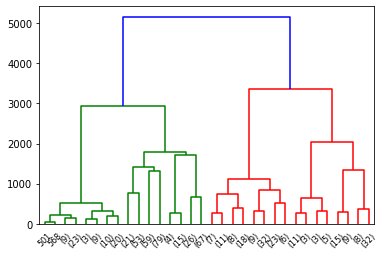

In [63]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

hierarchical = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = hierarchical.fit(X.fillna(0))
plot_dendrogram(model, truncate_mode='level', p=4)